In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from operator import itemgetter

# naive algo

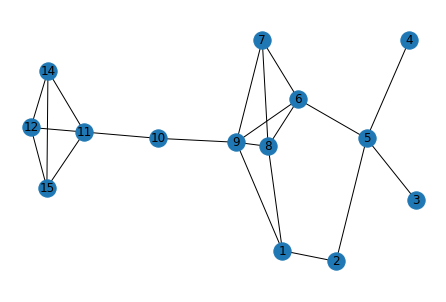

In [22]:
g = nx.Graph([])
g.add_edges_from([(1,2),(1,8),(1,9),
                  (5,2),
                  (5,3),
                  (5,4),
                  (5,6),
                  (6,7),
                  (6,8),
                  (6,9),
                  (7,8),
                  (7,9),
                  (8,9),
                  (9,10),
                  (10,11),
                  (11,14),
                  (11,15),
                  (11,12),
                  (14,15),
                  (15,12),
                  (12,14)
                 ])
nx.draw(g,with_labels=True)
plt.show()

In [31]:
nx.core_number(g)

{1: 2,
 2: 2,
 8: 3,
 9: 3,
 5: 2,
 3: 1,
 4: 1,
 6: 3,
 7: 3,
 10: 2,
 11: 3,
 14: 3,
 15: 3,
 12: 3}

In [23]:
def naive_approach(g):
    gg = copy.deepcopy(g)
    weights = dict(gg.degree)

    cores_g = dict(zip(gg.nodes,[0]*len(gg.nodes)))

    while len(gg.nodes) > 0:
        index_top , min_degree   = min(weights.items(), key=itemgetter(1))
        neighbors = list(gg.neighbors(index_top))
        cores_g[index_top] = min_degree
        gg.remove_node(index_top)
        weights.pop(index_top)

        if neighbors:
            new_degrees=gg.degree()
            for neigh in neighbors:
                weights[neigh] = max(min_degree,new_degrees[neigh])
                
    return cores_g

In [24]:
naive_approach(g)==nx.core_number(g)

True

# Approach 1

In [25]:
def core_number_1(G):
    degrees = dict(G.degree())
    nodes = sorted(degrees, key=degrees.get)
    nbrs = {v: list(nx.all_neighbors(G, v)) for v in G}
    i=0
    count_passed_through = []
    while len(count_passed_through)<len(nodes):
        nodes = sorted(degrees, key=degrees.get)       
        st =  set(count_passed_through)
        v = [ele for ele in nodes if ele not in st][0]  ### check mainting order

        for u in nbrs[v]:
            if degrees[u] > degrees[v]:
                degrees[u] -= 1
        count_passed_through.append(v)

    return degrees

In [26]:
core_number_1(g)==nx.core_number(g)

True

In [30]:
nx.core_number(g)

{1: 2,
 2: 2,
 8: 3,
 9: 3,
 5: 2,
 3: 1,
 4: 1,
 6: 3,
 7: 3,
 10: 2,
 11: 3,
 14: 3,
 15: 3,
 12: 3}

# Best approach (nx code, reformaté)

In [27]:
def core_number(G):

    degrees = dict(G.degree())
    # Sort nodes by degree.
    nodes = sorted(degrees, key=degrees.get)
    bin_boundaries = [0]
    curr_degree = 0
    for i, v in enumerate(nodes):
        if degrees[v] > curr_degree:
            bin_boundaries.extend([i] * (degrees[v] - curr_degree))
            curr_degree = degrees[v]
    node_pos = {v: pos for pos, v in enumerate(nodes)}
    
    # The initial guess for the core number of a node is its degree.
    core = degrees
    nbrs = {v: list(nx.all_neighbors(G, v)) for v in G}
    for v in nodes:
        for u in nbrs[v]:
            if core[u] > core[v]:
                nbrs[u].remove(v)
                pos = node_pos[u]
                bin_start = bin_boundaries[core[u]]
                node_pos[u] = bin_start
                node_pos[nodes[bin_start]] = pos
                nodes[bin_start], nodes[pos] = nodes[pos], nodes[bin_start]
                bin_boundaries[core[u]] += 1
                core[u] -= 1
    return core

In [29]:
core_number(g)==nx.core_number(g)

True

# approach comparison

## time

In [281]:
%timeit naive_approach(g)

270 µs ± 4.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [310]:
%timeit core_number_1(g)

The slowest run took 4.09 times longer than the fastest. This could mean that an intermediate result is being cached.
127 µs ± 60.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [286]:
%timeit core_number(g)

34.2 µs ± 3.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## memory usage

In [154]:
# pip install memory_profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.57.0-cp37-none-any.whl size=28995 sha256=10f3f3d40dfd8421a5751e3acf464d6c3f84974803360a4f2d7b98b2d18e1d1e
  Stored in directory: /home/jaime/.cache/pip/wheels/74/20/b5/20964ef97be73d2c3a695c9cad7bccd96d1e3e737a8163861f
Successfully built memory-profiler
Note: you may need to restart the kernel to use updated packages.


In [155]:
# %load_ext memory_profiler

In [158]:
%memit naive_approach(g)

peak memory: 164.46 MiB, increment: 0.00 MiB


In [159]:
%memit core_number(g)

peak memory: 164.46 MiB, increment: 0.00 MiB
